Importing Libraries

In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, callbacks
import seaborn as sn


Creating Deep Neural Network and evaluating accuracy on Testing Dataset

In [2]:

labels = {'left': 0, 'right': 1, 'forward': 2, 'flip': 3, 'stop':4,'backward': 5, 'up': 6, 'down':7}
np.random.seed(42)

df = pd.read_csv('my_data.csv',index_col=0)
X = df.drop("label", axis=1)
y = df["label"].map(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

model = models.Sequential([
    layers.Dense(64, activation='relu' , input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',    
    patience=10,          
    verbose=1             
)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping],shuffle=True)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')




Epoch 1/200


67/67 [==============================] - 2s 8ms/step - loss: 2.3681 - accuracy: 0.6607 - val_loss: 0.5378 - val_accuracy: 0.8023
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8549 - val_loss: 0.2023 - val_accuracy: 0.9379
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9533 - val_loss: 0.1102 - val_accuracy: 0.9623
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9826 - val_loss: 0.1672 - val_accuracy: 0.9322
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9175 - val_loss: 0.1008 - val_accuracy: 0.9699
Epoch 6/200
67/67 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9618 - val_loss: 0.5853 - val_accuracy: 0.8644
Epoch 7/200
67/67 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9458 - val_loss: 0.0430 - val_accuracy: 0.9925
Epoch 8/2

Plotting Training and Validation Loss vs Number of Epochs

Epoch 1/200
54/54 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.9505 - val_loss: 0.0789 - val_accuracy: 0.9765
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9611 - val_loss: 0.1536 - val_accuracy: 0.9506
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 0.1181 - val_accuracy: 0.9671
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 0.1096 - val_accuracy: 0.9624
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9670 - val_loss: 0.0259 - val_accuracy: 0.9929
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9882 - val_loss: 0.2957 - val_accuracy: 0.8824
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9918 - val_loss: 0.0118 - val_accuracy: 0.9976
Epoch 8/200
5

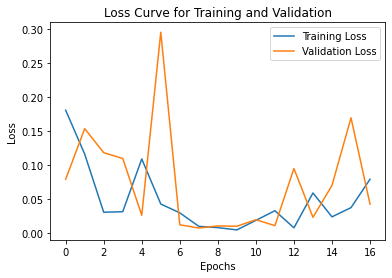

In [3]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Scatter Plot of Dataset

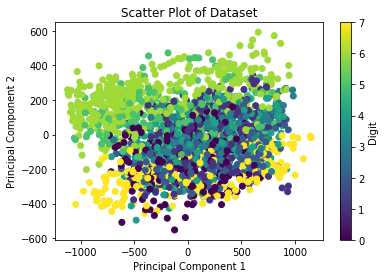

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train)

plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Dataset')
plt.colorbar(label='Digit')
plt.show()


Confusion Matrix

17/17 [==============================] - 0s 4ms/step


Text(114.0, 0.5, 'actual')

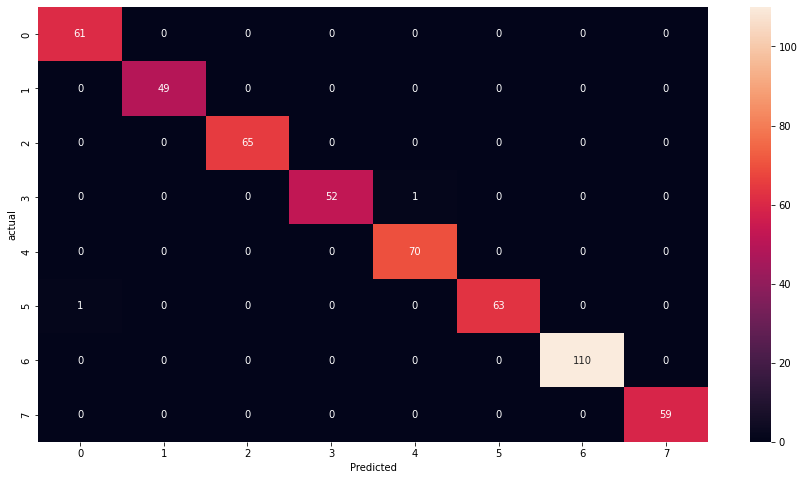

In [6]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(15,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

Real Time Hand Gesture Recognition 

In [7]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np 

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                arr = []
                for index, val in enumerate(hand_landmarks.landmark):
                    arr.append(640*val.x)
                    arr.append(480*val.y)
                    
                prediction = np.argmax(model.predict(np.expand_dims(arr,axis=0)))
                predictions = np.array((model.predict(np.expand_dims(arr,axis=0))).flatten())
                if max(predictions)>0.98:
                    predicted_label = list(labels.keys())[list(labels.values()).index(prediction)]
                    cv2.putText(image,predicted_label,  (50, 50),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 255),  2,  cv2.LINE_4)

                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(1) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 21ms/step
